In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [40]:
raw_movies = pd.read_csv('http://files.grouplens.org/datasets/movielens/ml-100k/u.item', 
                         sep='|'
                        )
raw_movies.head()

,1,Toy Story (1995),01-Jan-1995,Unnamed: 3,http://us.imdb.com/M/title-exact?Toy%20Story%20(1995),0,0.1,0.2,1.1,1.2,...,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15
0,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
m_columns = ['id', 'title','release_date','video_release_date','imdb_url'
            ]
movies = pd.read_csv('http://files.grouplens.org/datasets/movielens/ml-100k/u.item', 
                         sep='|', names=m_columns, usecols=range(5))

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1682 entries, 0 to 1681
Data columns (total 5 columns):
id                    1682 non-null int64
title                 1682 non-null object
release_date          1681 non-null object
video_release_date    0 non-null float64
imdb_url              1679 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 78.8+ KB


In [7]:
u_columns = ['user_id', 'age']
users = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.user',
    sep='|', names=u_columns, usecols=range(2))

In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 0 to 942
Data columns (total 2 columns):
user_id    943 non-null int64
age        943 non-null int64
dtypes: int64(2)
memory usage: 22.1 KB


In [9]:
users.describe()


,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [11]:
users.tail()

,user_id,age
938,939,26
939,940,32
940,941,20
941,942,48
942,943,22


In [12]:
users['age'].head()


0    24
1    53
2    23
3    24
4    33
Name: age, dtype: int64

In [14]:
movies[['title','release_date']].tail()


,title,release_date
1677,Mat' i syn (1997),06-Feb-1998
1678,B. Monkey (1998),06-Feb-1998
1679,Sliding Doors (1998),01-Jan-1998
1680,You So Crazy (1994),01-Jan-1994
1681,Scream of Stone (Schrei aus Stein) (1991),08-Mar-1996


In [16]:
users[users.age > 25].describe()

,user_id,age
count,671.000000,671.000000
mean,471.707899,39.344262
std,275.714666,10.373292
min,2.000000,26.000000
25%,224.500000,30.000000
50%,476.000000,37.000000
75%,717.000000,47.000000
max,942.000000,73.000000


In [19]:
movies[movies.title.str.startswith('Toy')]

,id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...


In [25]:
u_columns = ['user_id', 'age', 'sex','occupation','zip_code']
users = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.user',
    sep='|', names=u_columns, usecols=range(5))
r_columns = ['user_id', 'id', 'rating', 'timestamp']
ratings = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.data',
    sep='\t', names=r_columns, usecols=range(4))

In [26]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
sex           943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 44.2+ KB


In [27]:
ratings.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user_id      100000 non-null int64
id           100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.8 MB


In [28]:
movie_ratings = pd.merge(movies,ratings)


In [29]:
movie_ratings.head()


,id,title,release_date,video_release_date,imdb_url,user_id,rating,timestamp
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532
1,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,287,5,875334088
2,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,148,4,877019411
3,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,280,4,891700426
4,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,66,3,883601324


In [30]:
movie_lens = pd.merge(movie_ratings,users)

In [31]:
movie_lens.head()

,id,title,release_date,video_release_date,imdb_url,user_id,rating,timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076


In [32]:
movie_lens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 12 columns):
id                    100000 non-null int64
title                 100000 non-null object
release_date          99991 non-null object
video_release_date    0 non-null float64
imdb_url              99987 non-null object
user_id               100000 non-null int64
rating                100000 non-null int64
timestamp             100000 non-null int64
age                   100000 non-null int64
sex                   100000 non-null object
occupation            100000 non-null object
zip_code              100000 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 9.9+ MB


In [33]:
movie_lens.groupby('title').size().order(ascending=False)[:25]

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


title
Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Back to the Fu

In [39]:
movie_lens.groupby('title').
    agg({'rating':[np.size,np.mean]}).
    sort([('rating', 'size')], ascending=False).head()

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


rating          
                            size      mean
title                                     
Star Wars (1977)             583  4.358491
Contact (1997)               509  3.803536
Fargo (1996)                 508  4.155512
Return of the Jedi (1983)    507  4.007890
Liar Liar (1997)             485  3.156701

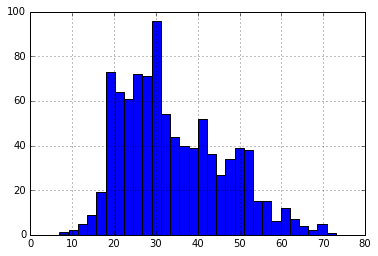

In [41]:
users.age.hist(bins=30)

In [42]:
labels = ['0-9','10,19', '20,29', '30,39', '40,49', '50,59', '60,69', '70,79' ]
movie_lens['age_group'] = 
    pd.cut(movie_lens.age, range(0,81,10), right=False, labels=labels)

In [49]:
movie_lens[['title','age','age_group']][300:400]

,title,age,age_group
300,"Christmas Carol, A (1938)",60,"60,69"
301,Microcosmos: Le peuple de l'herbe (1996),60,"60,69"
302,"Howling, The (1981)",60,"60,69"
303,"Cook the Thief His Wife & Her Lover, The (1989)",60,"60,69"
304,Paths of Glory (1957),60,"60,69"
305,"Grifters, The (1990)",60,"60,69"
306,Once Upon a Time in the West (1969),60,"60,69"
307,"Quiet Man, The (1952)",60,"60,69"
308,Once Upon a Time in America (1984),60,"60,69"
309,Touch of Evil (1958),60,"60,69"


In [50]:
movie_lens[['age', 'age_group']].drop_duplicates()[:100
                                                  ]

,age,age_group
0,60,"60,69"
397,21,"20,29"
459,33,"30,39"
524,30,"30,39"
782,23,"20,29"
995,29,"20,29"
1229,26,"20,29"
1664,31,"30,39"
1942,24,"20,29"
2270,32,"30,39"


In [51]:
most_50 = movie_lens.groupby('id').size().order(ascending=False)[:50]

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


In [52]:
movie_lens.head()

,id,title,release_date,video_release_date,imdb_url,user_id,rating,timestamp,age,sex,occupation,zip_code,age_group
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076,"60,69"
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076,"60,69"
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076,"60,69"
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076,"60,69"
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076,"60,69"


In [53]:
movie_lens.set_index('id', inplace=True)

In [54]:
movie_lens.head()

,title,release_date,video_release_date,imdb_url,user_id,rating,timestamp,age,sex,occupation,zip_code,age_group
id,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076,"60,69"
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076,"60,69"
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076,"60,69"
7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076,"60,69"
8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076,"60,69"


In [55]:
by_age = movie_lens.ix[most_50.index].groupby(['title','age_group'])
by_age.rating.mean().head()

title                 age_group
Air Force One (1997)  10,19        3.647059
                      20,29        3.666667
                      30,39        3.570000
                      40,49        3.555556
                      50,59        3.750000
Name: rating, dtype: float64

In [58]:
by_age.rating.mean().unstack(1).fillna(0)[:20]

age_group,0-9,"10,19","20,29","30,39","40,49","50,59","60,69","70,79"
title,,,,,,,,
Air Force One (1997),0,3.647059,3.666667,3.570000,3.555556,3.750000,3.666667,3.666667
Alien (1979),0,4.111111,4.026087,4.103448,3.833333,4.272727,3.500000,4.000000
Aliens (1986),0,4.050000,4.087719,3.887640,3.526316,4.235294,3.800000,3.000000
Apollo 13 (1995),4,3.954545,3.845455,4.064935,3.822222,4.187500,3.750000,4.000000
Back to the Future (1985),0,4.037037,3.720588,3.915789,4.036364,3.500000,3.857143,4.000000
"Birdcage, The (1996)",0,3.217391,3.413223,3.514286,3.500000,3.346154,3.888889,0.000000
Braveheart (1995),0,4.384615,4.194915,4.156627,4.051282,3.956522,3.714286,4.000000
Conspiracy Theory (1997),0,3.565217,3.382114,3.419355,3.465116,3.538462,2.600000,0.000000
Contact (1997),5,3.693878,3.785714,3.847458,3.866667,3.739130,3.777778,0.000000


In [59]:
movie_lens.reset_index('id', inplace=True)

In [60]:
pivoted = movie_lens.pivot_table(index=['id','title'],
                                columns=['sex'],
                                values='rating',
                                fill_value=0)
pivoted.head()

,sex,F,M
id,title,,
1,Toy Story (1995),3.789916,3.909910
2,GoldenEye (1995),3.368421,3.178571
3,Four Rooms (1995),2.687500,3.108108
4,Get Shorty (1995),3.400000,3.591463
5,Copycat (1995),3.772727,3.140625


In [61]:
pivoted['diff'] = pivoted.M - pivoted.F

In [62]:
pivoted.head()

,sex,F,M,diff
id,title,,,
1,Toy Story (1995),3.789916,3.909910,0.119994
2,GoldenEye (1995),3.368421,3.178571,-0.189850
3,Four Rooms (1995),2.687500,3.108108,0.420608
4,Get Shorty (1995),3.400000,3.591463,0.191463
5,Copycat (1995),3.772727,3.140625,-0.632102


In [63]:
pivoted.reset_index('id', inplace=True)
disagreements = pivoted[pivoted.id.isin(most_50.index)]['diff']

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


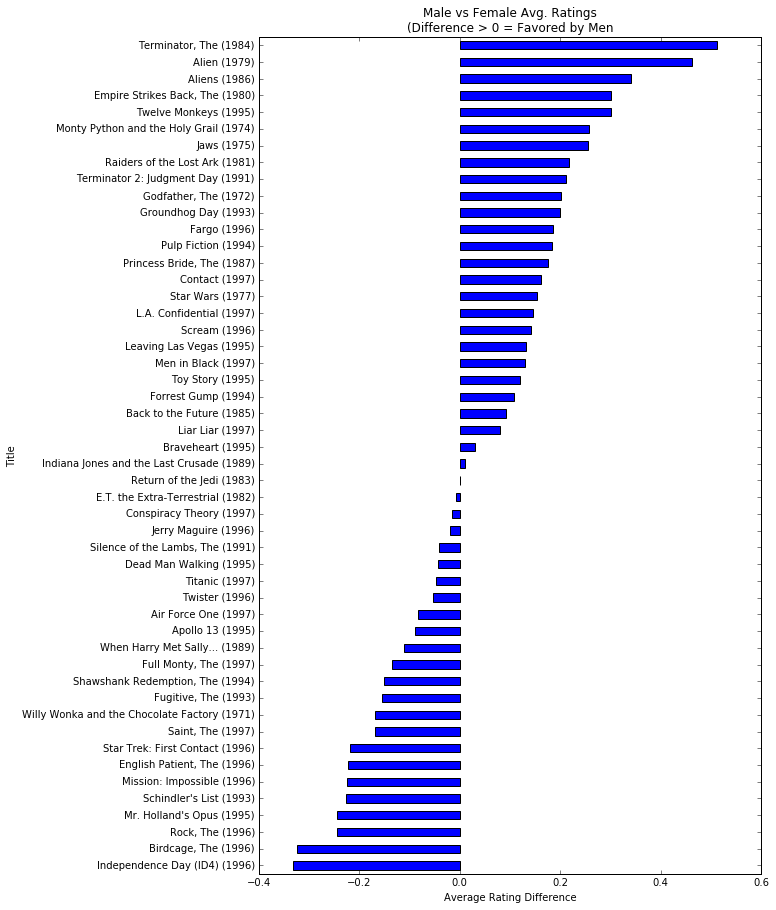

In [66]:
disagreements.order().plot(kind='barh', figsize=[9,15])
plt.title('Male vs Female Avg. Ratings\n(Difference > 0 = Favored by Men')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference')